In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
donnees = pd.read_csv('./pointsSVM.csv',sep=';')

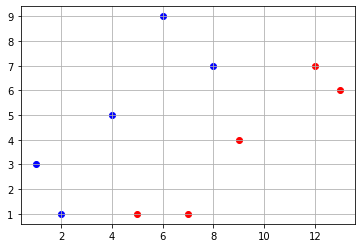

In [101]:
donnees = np.array(donnees)
x = donnees[:,0:2]
y = donnees[:,2]
axis = plt.axes()
axis.grid()
plt.scatter(x[y == 1][:,0], x[y == 1][:,1],color='r')
plt.scatter(x[y == -1][:,0], x[y == -1][:,1],color='b')
plt.show()

In [102]:
def f(X,Beta): return Beta[0]+sum(X.T*Beta[1:])

In [103]:
def classer(X,Beta): return int(sign(f(X,Beta)))

In [104]:
from sklearn.svm import LinearSVC, SVC

In [105]:
lsvm = LinearSVC(C = 10000)
lsvm.fit(x,y)
score = lsvm.score(x,y)
print(score)

1.0


In [106]:
Beta = list(lsvm.intercept_) + list(lsvm.coef_[0])
print(Beta)


[-1.5553693379130449, 0.6665958985804211, -0.7776839893947494]


[-1.5553693379130449, 0.6665958985804211, -0.7776839893947494]
[5,1]    ==> 0.9999261655943115


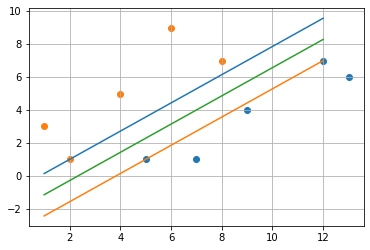

In [107]:
axes = plt.axes()
axes.grid();
plt.scatter(x[y == 1][:,0],x[y == 1][:,1])
plt.scatter(x[y == -1][:,0],x[y == -1][:,1])
Bleu = [];Rouge = [];milieu = []
for i in range(1,13):
    y = -1.0 * (Beta[0] + Beta[1]*i + 1)/Beta[2]; Bleu+=[y]
    y = -1.0 * (Beta[0] + Beta[1]*i - 1)/Beta[2]; Rouge+=[y]
    y = -1.0 * (Beta[0] + Beta[1]*i)/Beta[2]; milieu+=[y]

plt.plot(np.arange(1,13),Bleu)
plt.plot(np.arange(1,13),Rouge)
plt.plot(np.arange(1,13),milieu)
print(Beta)
print("[5,1]    ==>", f(np.array([5,1]),Beta))